<a href="https://colab.research.google.com/github/ruthujapatil/ruthujapatil/blob/main/Assignment_SimpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv('/content/delivery_time.csv')

In [ ]:
dataset.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
dataset.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [ ]:
dataset.columns=['DeliveryTime','SortingTime']

In [ ]:
dataset.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DeliveryTime', ylabel='Density'>

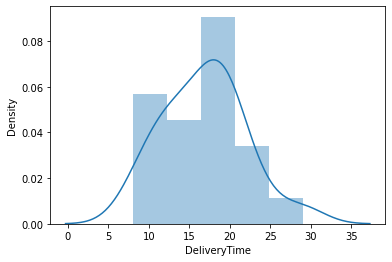

In [ ]:
import seaborn as sns
sns.distplot(dataset['DeliveryTime'])

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SortingTime', ylabel='Density'>

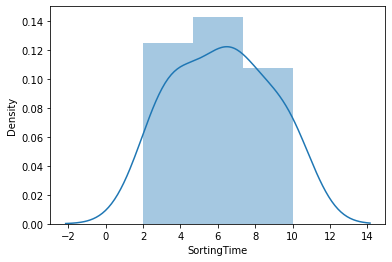

In [ ]:
sns.distplot(dataset['SortingTime'])

Fitting a Linear Regression Model

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols("DeliveryTime~SortingTime",data = dataset).fit()

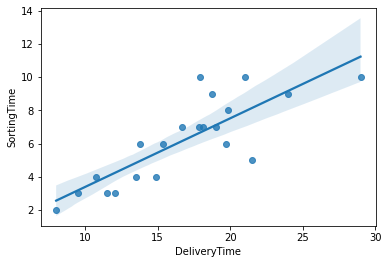

In [ ]:
sns.regplot(x="DeliveryTime", y="SortingTime", data=dataset);

In [ ]:
#Coefficients
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [ ]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues) 

Intercept      3.823349
SortingTime    6.387447
dtype: float64 
 Intercept      0.001147
SortingTime    0.000004
dtype: float64


In [ ]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [ ]:
#Predict for 3 and 5 daily circulation
newdata=pd.Series([3,5])
newdata

0    3
1    5
dtype: int64

In [ ]:
data_pred=pd.DataFrame(newdata,columns=['SortingTime'])

In [ ]:
model.predict(data_pred)

0    11.529794
1    14.827833
dtype: float64